In [80]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
# import xlrd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv("Shortage data/Zip_Files/shortage_final.csv")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df=df.dropna(subset=['actual_start_date','actual_end_date'] )
df = df.loc[(df['actual_start_date'] >= '2017-01-01')]
df = df.loc[(df['actual_end_date'] >= '2010-01-01')]
df.tail()

,report_id,drug_identification_number,report_type,brand_name,company_name,common_or_proper_name,ingredients,strength(s),packaging_size,route_of_administration,...,atc_code,atc_description,anticipated_start_date,actual_start_date,estimated_end_date,actual_end_date,reason,date_created,date_updated,tier_3
17163,21685,2340445.0,Shortage,ZYCLARA,VALEANT CANADA LP/VALEANT CANADA S.E.C.,ZYCLARA,IMIQUIMOD,3.75%,na,TOPICAL,...,D06BB,CHEMOTHERAPEUTICS FOR TOPICAL USE,NaN,2017-09-08,2017-09-22,2017-09-22,Other (Please describe in comments),2017-09-08,2017-09-25,No
17164,52702,2340445.0,Shortage,ZYCLARA,VALEANT CANADA LP/VALEANT CANADA S.E.C.,ZYCLARA,IMIQUIMOD,3.75%,7.5g pump,TOPICAL,...,D06BB,CHEMOTHERAPEUTICS FOR TOPICAL USE,NaN,2019-04-01,NaN,2019-07-12,Other (Please describe in comments),2018-06-20,2019-07-13,No
17165,18241,2257270.0,Shortage,ZYMAR,ALLERGAN INC,ZYMAR 1mL,GATIFLOXACIN,0.3%,1 mL,OPHTHALMIC,...,S01AE,ANTIINFECTIVES,2017-08-03,2017-08-03,2017-09-18,2017-10-06,Disruption of the manufacture of the drug.,2017-08-03,2017-10-13,No
17166,33440,2257270.0,Shortage,ZYMAR,ALLERGAN INC,ZYMAR 1mL,GATIFLOXACIN,0.3%,5mL,OPHTHALMIC,...,S01AE,ANTIINFECTIVES,2019-09-16,2019-09-16,2019-09-20,2019-09-18,Disruption of the manufacture of the drug.,2017-12-18,2019-09-19,No
17167,54338,2243686.0,Shortage,ZYVOXAM,PFIZER CANADA INC,Zyvoxam,LINEZOLID,3G,1x240ml Btl,ORAL,...,J01XX,OTHER ANTIBACTERIALS,NaN,2018-08-21,NaN,2018-10-23,Disruption of the manufacture of the drug.,2018-07-04,2018-10-24,No


In [101]:
df['actual_start_date'] = df['actual_start_date'].astype('datetime64[D]')

In [102]:
df['actual_end_date'] = df['actual_end_date'].astype('datetime64[D]')

In [103]:
df['drug_identification_number'] = df['drug_identification_number'].fillna(0)
df['drug_identification_number'] = df['drug_identification_number'].astype('int')

In [104]:
df.dtypes

report_id                              int64
drug_identification_number             int32
report_type                           object
brand_name                            object
company_name                          object
common_or_proper_name                 object
ingredients                           object
strength(s)                           object
packaging_size                        object
route_of_administration               object
shortage_status                       object
dosage_form(s)                        object
atc_code                              object
atc_description                       object
anticipated_start_date                object
actual_start_date             datetime64[ns]
estimated_end_date                    object
actual_end_date               datetime64[ns]
reason                                object
date_created                          object
date_updated                          object
tier_3                                object
dtype: obj

In [106]:
df=df.drop_duplicates("report_id", keep=False)

In [107]:
df['Days']= df['actual_end_date']-df['actual_start_date']

In [108]:
df.drug_identification_number.value_counts()[:10]

717002     28
60208      22
60348      21
2293838    18
2245523    18
2242984    17
592277     16
608165     16
812382     15
2139510    15
Name: drug_identification_number, dtype: int64

<AxesSubplot:>

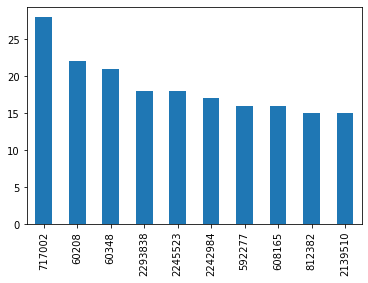

In [109]:
df.drug_identification_number.value_counts()[:10].plot(kind='bar')

In [110]:
df['Days2'] = df['Days'].dt.days
df['Days2']=df['Days2'].astype('int')

In [111]:
df= df[(df['Days2']>0)]

In [112]:
df2 = df[df.drug_identification_number==717002]

In [113]:
df2.shape

(28, 24)

array([[<AxesSubplot:title={'center':'Days2'}>]], dtype=object)

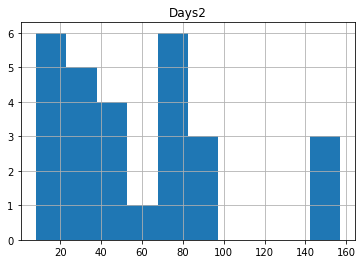

In [114]:
df2.hist(column='Days2')

<AxesSubplot:title={'center':'Days Distribution'}, ylabel='# of Days'>

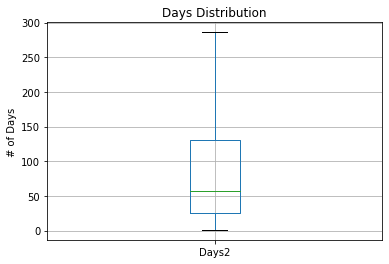

In [115]:
# Create a box plot to identify outliers

Boxplot, bp=plt.subplots()
# bp.set_xlabel('Days')
bp.set_ylabel('# of Days')
bp.set_title('Days Distribution')
bp.grid()
df.boxplot(column="Days2", showfliers=False)

In [116]:
df2.head()

,report_id,drug_identification_number,report_type,brand_name,company_name,common_or_proper_name,ingredients,strength(s),packaging_size,route_of_administration,...,anticipated_start_date,actual_start_date,estimated_end_date,actual_end_date,reason,date_created,date_updated,tier_3,Days,Days2
7884,107028,717002,Shortage,VIADERM KC CRM,TARO PHARMACEUTICALS INC,VIADERM KC CRM,TRIAMCINOLONE ACETONIDE\r NYSTATIN\r GRAMICIDI...,1MG\r 100000UNIT\r 0.25MG\r 2.5MG,15 g,TOPICAL,...,NaN,2020-02-21,2020-04-17,2020-04-29,Disruption of the manufacture of the drug.,2020-02-24,2020-05-01,No,68 days,68
7885,108059,717002,Shortage,VIADERM KC CRM,TARO PHARMACEUTICALS INC,VIADERM KC CRM,TRIAMCINOLONE ACETONIDE\r NYSTATIN\r GRAMICIDI...,1MG\r 100000UNIT\r 0.25MG\r 2.5MG,454 g,TOPICAL,...,NaN,2020-03-06,2020-05-08,2020-04-30,Disruption of the manufacture of the drug.,2020-03-07,2020-05-01,No,55 days,55
7886,127274,717002,Shortage,VIADERM KC CRM,TARO PHARMACEUTICALS INC,VIADERM KC CRM,TRIAMCINOLONE ACETONIDE\r NEOMYCIN\r GRAMICIDI...,1MG\r 2.5MG\r 0.25MG\r 100000UNIT,454,TOPICAL\r\nTOPICAL,...,NaN,2020-08-28,2020-11-06,2020-11-05,Disruption of the manufacture of the drug.,2020-10-27,2020-11-06,No,69 days,69
7887,123231,717002,Shortage,VIADERM KC CRM,TARO PHARMACEUTICALS INC,VIADERM KC CRM,TRIAMCINOLONE ACETONIDE\r NEOMYCIN\r GRAMICIDI...,1MG\r 2.5MG\r 0.25MG\r 100000UNIT,15,TOPICAL\r\nTOPICAL,...,NaN,2020-08-15,2020-11-06,2020-11-05,Disruption of the manufacture of the drug.,2020-08-28,2020-11-06,No,82 days,82
7888,123234,717002,Shortage,VIADERM KC CRM,TARO PHARMACEUTICALS INC,VIADERM KC CRM,TRIAMCINOLONE ACETONIDE\r NEOMYCIN\r GRAMICIDI...,1MG\r 2.5MG\r 0.25MG\r 100000UNIT,454,TOPICAL\r\nTOPICAL,...,NaN,2020-08-15,NaN,2020-10-02,Disruption of the manufacture of the drug.,2020-08-29,2020-10-03,No,48 days,48


In [119]:
df2.dtypes

report_id                               int64
drug_identification_number              int32
report_type                            object
brand_name                             object
company_name                           object
common_or_proper_name                  object
ingredients                            object
strength(s)                            object
packaging_size                         object
route_of_administration                object
shortage_status                        object
dosage_form(s)                         object
atc_code                               object
atc_description                        object
anticipated_start_date                 object
actual_start_date              datetime64[ns]
estimated_end_date                     object
actual_end_date                datetime64[ns]
reason                                 object
date_created                           object
date_updated                           object
tier_3                            

In [121]:
col_list = ['actual_start_date', 'Days2']

In [122]:
df2 = df2[col_list]

In [123]:
df2.head()

,actual_start_date,Days2
7884,2020-02-21,68
7885,2020-03-06,55
7886,2020-08-28,69
7887,2020-08-15,82
7888,2020-08-15,48


In [125]:
df2.columns = ['ds', 'y']

In [126]:
df2.shape

(28, 2)

In [127]:
p = Prophet(interval_width=0.5, daily_seasonality=True)

In [128]:
model = p.fit(df2)

12:25:05 - cmdstanpy - INFO - Chain [1] start processing
12:25:05 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
future = p.make_future_dataframe(periods=50, freq='D')
future.tail()

,ds
69,2023-03-13
70,2023-03-14
71,2023-03-15
72,2023-03-16
73,2023-03-17


In [130]:
forecast_prediction = p.predict(future)
forecast_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-27,12.269362,31.913625,38.045188,12.269362,12.269362,22.729968,22.729968,22.729968,195.994404,...,51.999640,51.999640,51.999640,-225.264076,-225.264076,-225.264076,0.0,0.0,0.0,34.999330
1,2019-07-04,10.912126,23.608716,29.939690,10.912126,10.912126,16.088876,16.088876,16.088876,195.994404,...,51.999640,51.999640,51.999640,-231.905168,-231.905168,-231.905168,0.0,0.0,0.0,27.001002
2,2019-08-14,2.962603,26.600480,32.851264,2.962603,2.962603,27.055476,27.055476,27.055476,195.994404,...,14.373695,14.373695,14.373695,-183.312622,-183.312622,-183.312622,0.0,0.0,0.0,30.018079
3,2019-09-09,-2.078558,7.758215,14.386854,-2.078558,-2.078558,13.090025,13.090025,13.090025,195.994404,...,-68.873416,-68.873416,-68.873416,-114.030963,-114.030963,-114.030963,0.0,0.0,0.0,11.011468
4,2019-09-12,-2.660230,4.571934,11.025445,-2.660230,-2.660230,10.650906,10.650906,10.650906,195.994404,...,51.999640,51.999640,51.999640,-237.343138,-237.343138,-237.343138,0.0,0.0,0.0,7.990676


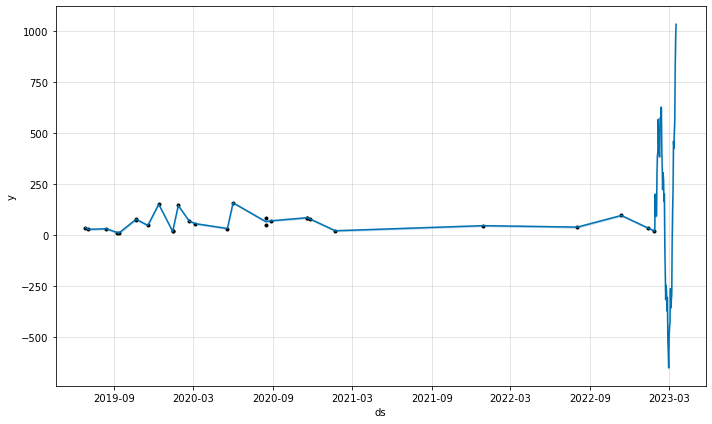

In [131]:
plot1 = p.plot(forecast_prediction)

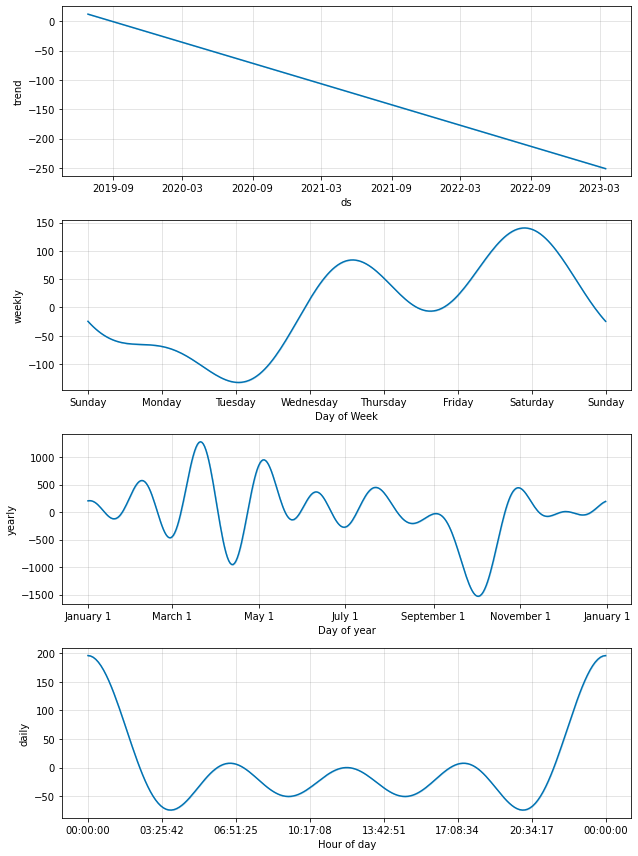

In [132]:
plot2 = p.plot_components(forecast_prediction)